## Assignment 5
### Name: Jayesh Nayak
### Roll No.: 121CS0195

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD,Adam,Nadam
from tensorflow import keras
from tensorflow.keras import layers
from keras_tuner import RandomSearch,GridSearch,BayesianOptimization,Hyperband
# extra
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,AveragePooling2D

### 1. Implement convolutional neural network (CNN) models with following specifications using TensorFlow for classifying the MNIST dataset. Train the model on the MNIST training set and evaluate its performance on the test set. Write modularized code and call it 3 times and compute the mean of test accuracy for each of the following 3 Sequential models.

In [2]:
# Mnist data load
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
#check shape
train_images.shape, train_labels.shape,test_images.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

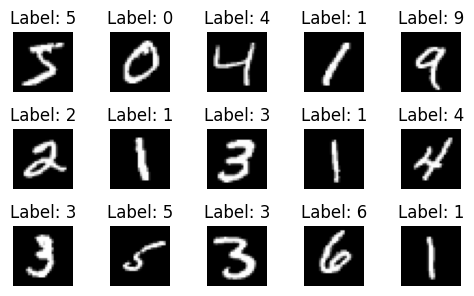

In [4]:
# Display some sample images
plt.figure(figsize=(5,5))
for i in range(15):
    plt.subplot(5, 5, i+1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(f"Label: {train_labels[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [5]:
# take sample of 1000 image from dataset
X_trn = train_images[:20000]
y_trn = train_labels[:20000]
X_tst = test_images[:20000]
y_tst = test_labels[:20000]

In [6]:
X_trn.shape,y_trn.shape,X_tst.shape,y_tst.shape

((20000, 28, 28), (20000,), (10000, 28, 28), (10000,))

### CNN Model

In [7]:
model = Sequential(
    [
        Conv2D(32, (3, 3), strides=2, activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D((2, 2), strides=1),
        Conv2D(16, (4, 4), strides=2, activation='relu'),
        MaxPooling2D((4, 4), strides=2),
        Flatten(),
        Dense(8, activation='relu'),
        Dense(10, activation='softmax')
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 13, 13, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 5, 5, 16)          8208      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 1, 1, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 16)                0         
                                                                 
 dense (Dense)               (None, 8)                 1

### a. Model-1: Add a convolution layer with 32 3 × 3 filters with stride 2 and relu activation. Add a maxpooling layer with kernel size 2 × 2 with stride 1. Add a convolution layer with 16 4 × 4 filters with stride 2 and relu activation. Add a maxpooling layer with kernel size 4 × 4 with stride 2. Flatten the output and add a fully connected layer with 8 neurons with relu activation. Add a fully connected layer with 10 neurons and softmax activation. Use Adam optimizer with batch size 128, learning rate 0.01 and epochs set to 5.


In [8]:
model = Sequential(
    [
        Conv2D(32, (3, 3), strides=2, activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D((2, 2), strides=1),
        Conv2D(16, (4, 4), strides=2, activation='relu'),
        MaxPooling2D((4, 4), strides=2),
        Flatten(),
        Dense(8, activation='relu'),
        Dense(10, activation='softmax')
    ]
)

num_calls = 3 #Number of times to call the model

test_accuracies = [] #List to store test accuracies

for i in range(num_calls): 
    print("step: ",i+1)

    adam_optimizer = Adam(learning_rate=0.01)
    model.compile(optimizer=adam_optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model.fit(X_trn, y_trn, batch_size=128, epochs=5)

    _, test_accuracy = model.evaluate(X_tst, y_tst,verbose=0) # Evaluate the model on the test set

    test_accuracies.append(test_accuracy) # Append test accuracy to the list

mean_test_accuracy = np.mean(test_accuracies)   # Compute the mean of test accuracies
print("Mean Test Accuracy:", mean_test_accuracy)

step:  1
Epoch 1/5
157/157 [==============================] - 8s 6ms/step - loss: 4.0854 - accuracy: 0.1213
Epoch 2/5
157/157 [==============================] - 1s 5ms/step - loss: 2.1095 - accuracy: 0.1982
Epoch 3/5
157/157 [==============================] - 1s 4ms/step - loss: 1.7505 - accuracy: 0.3275
Epoch 4/5
157/157 [==============================] - 1s 4ms/step - loss: 1.5212 - accuracy: 0.4169
Epoch 5/5
157/157 [==============================] - 1s 4ms/step - loss: 1.4311 - accuracy: 0.4466
step:  2
Epoch 1/5
157/157 [==============================] - 1s 4ms/step - loss: 1.4062 - accuracy: 0.4701
Epoch 2/5
157/157 [==============================] - 1s 4ms/step - loss: 1.2710 - accuracy: 0.5265
Epoch 3/5
157/157 [==============================] - 1s 4ms/step - loss: 1.1503 - accuracy: 0.5818
Epoch 4/5
157/157 [==============================] - 1s 4ms/step - loss: 1.0914 - accuracy: 0.6153
Epoch 5/5
157/157 [==============================] - 1s 4ms/step - loss: 1.0236 - accuracy:

### b. Model-2: Add a convolution layer with 32 3 × 3 filters with stride 2 and relu activation. Add an average pooling layer with kernel size 2 × 2 with stride 1. Add a convolution layer with 16 4 × 4 filters with stride 2 and relu activation. Add an average pooling layer with kernel size 4 × 4 with stride 2. Flatten the output and add a fully connected layer with 8 neurons with relu activation. Add a fully connected layer with 10 neurons and softmax activation. Use Adam optimizer with batch size 128, learning rate 0.01 and epochs set to 5.

In [9]:
model = Sequential(
    [
        Conv2D(32, (3, 3), strides=2, activation='relu', input_shape=(28, 28, 1)),
        AveragePooling2D((2, 2), strides=1),
        Conv2D(16, (4, 4), strides=2, activation='relu'),
        AveragePooling2D((4, 4), strides=2),
        Flatten(),
        Dense(8, activation='relu'),
        Dense(10, activation='softmax')
    ]
)

num_calls = 3 #Number of times to call the model

test_accuracies = [] #List to store test accuracies

for i in range(num_calls):
    print("step: ",i+1)

    adam_optimizer = Adam(learning_rate=0.01)
    model.compile(optimizer=adam_optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model.fit(X_trn, y_trn, batch_size=128, epochs=5)

    _, test_accuracy = model.evaluate(X_tst, y_tst,verbose=0) # Evaluate the model on the test set

    test_accuracies.append(test_accuracy) # Append test accuracy to the list

mean_test_accuracy = np.mean(test_accuracies)   # Compute the mean of test accuracies
print("Mean Test Accuracy:", mean_test_accuracy)

step:  1
Epoch 1/5
157/157 [==============================] - 1s 5ms/step - loss: 2.3512 - accuracy: 0.1141
Epoch 2/5
157/157 [==============================] - 1s 5ms/step - loss: 2.3013 - accuracy: 0.1134
Epoch 3/5
157/157 [==============================] - 1s 4ms/step - loss: 2.3015 - accuracy: 0.1141
Epoch 4/5
157/157 [==============================] - 1s 4ms/step - loss: 2.3013 - accuracy: 0.1138
Epoch 5/5
157/157 [==============================] - 1s 4ms/step - loss: 2.3015 - accuracy: 0.1141
step:  2
Epoch 1/5
157/157 [==============================] - 2s 5ms/step - loss: 2.3017 - accuracy: 0.1141
Epoch 2/5
157/157 [==============================] - 1s 4ms/step - loss: 2.3015 - accuracy: 0.1125
Epoch 3/5
157/157 [==============================] - 1s 4ms/step - loss: 2.3015 - accuracy: 0.1126
Epoch 4/5
157/157 [==============================] - 1s 4ms/step - loss: 2.3012 - accuracy: 0.1125
Epoch 5/5
157/157 [==============================] - 1s 4ms/step - loss: 2.3014 - accuracy:

### c. Model-3: Add a convolution layer with 32 3 × 3 filters with stride 2, relu activation and same padding. Add a maxpooling layer with kernel size 2 × 2 with stride 1. Add a convolution layer with 16 4 × 4 filters with stride 2 and relu activation. Add a maxpooling layer with kernel size 4 × 4 with stride 2. Flatten the output and add a fully connected layer with 8 neurons with relu activation. Add a fully connected layer with 10 neurons and softmax activation. Use Adam optimizer with batch size 128, learning rate 0.01 and epochs set to 5.


In [10]:
model = Sequential(
    [
        Conv2D(32, (3, 3), strides=2, activation='relu', input_shape=(28, 28, 1), padding='same'),
        MaxPooling2D((2, 2), strides=1),
        Conv2D(16, (4, 4), strides=2, activation='relu'),
        MaxPooling2D((4, 4), strides=2),
        Flatten(),
        Dense(8, activation='relu'),
        Dense(10, activation='softmax')
    ]
)

num_calls = 3 #Number of times to call the model

test_accuracies = [] #List to store test accuracies

for i in range(num_calls):
    print("step: ",i+1)

    adam_optimizer = Adam(learning_rate=0.01)
    model.compile(optimizer=adam_optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model.fit(X_trn, y_trn, batch_size=128, epochs=5)

    _, test_accuracy = model.evaluate(X_tst, y_tst,verbose=0) # Evaluate the model on the test set

    test_accuracies.append(test_accuracy) # Append test accuracy to the list

mean_test_accuracy = np.mean(test_accuracies)   # Compute the mean of test accuracies
print("Mean Test Accuracy:", mean_test_accuracy)

step:  1
Epoch 1/5
157/157 [==============================] - 1s 4ms/step - loss: 2.8262 - accuracy: 0.1051
Epoch 2/5
157/157 [==============================] - 1s 4ms/step - loss: 2.3016 - accuracy: 0.1123
Epoch 3/5
157/157 [==============================] - 1s 4ms/step - loss: 2.3014 - accuracy: 0.1130
Epoch 4/5
157/157 [==============================] - 1s 4ms/step - loss: 2.3012 - accuracy: 0.1141
Epoch 5/5
157/157 [==============================] - 1s 4ms/step - loss: 2.3015 - accuracy: 0.1141
step:  2
Epoch 1/5
157/157 [==============================] - 1s 4ms/step - loss: 2.3015 - accuracy: 0.1141
Epoch 2/5
157/157 [==============================] - 1s 4ms/step - loss: 2.3015 - accuracy: 0.1116
Epoch 3/5
157/157 [==============================] - 1s 4ms/step - loss: 2.3014 - accuracy: 0.1141
Epoch 4/5
157/157 [==============================] - 1s 4ms/step - loss: 2.3014 - accuracy: 0.1130
Epoch 5/5
157/157 [==============================] - 1s 4ms/step - loss: 2.3014 - accuracy:

### d. Model-4: Add a convolution layer with 32 3 × 3 filters with stride 2, relu activation and zero padding. Add a maxpooling layer with kernel size 2 × 2 with stride 1. Add a convolution layer with 16 4 × 4 filters with stride 2, relu activation and zero padding. Add a maxpooling layer with kernel size 4 × 4 with stride 2. Flatten the output and add a fully connected layer with 8 neurons with relu activation. Add a fully connected layer with 10 neurons and softmax-activation. Use Adam optimizer with batch size 128, learning rate 0.01 and epochs set to 5.

In [11]:
model = Sequential(
    [
        Conv2D(32, (3, 3), strides=2, activation='relu', input_shape=(28, 28, 1), padding='valid'),
        MaxPooling2D((2, 2), strides=1),
        Conv2D(16, (4, 4), strides=2, activation='relu'),
        MaxPooling2D((4, 4), strides=2),
        Flatten(),
        Dense(8, activation='relu'),
        Dense(10, activation='softmax')
    ]
)

num_calls = 3 #Number of times to call the model

test_accuracies = [] #List to store test accuracies

for i in range(num_calls):
    print("step: ",i+1)

    adam_optimizer = Adam(learning_rate=0.01)
    model.compile(optimizer=adam_optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model.fit(X_trn, y_trn, batch_size=128, epochs=5)

    _, test_accuracy = model.evaluate(X_tst, y_tst,verbose=0) # Evaluate the model on the test set

    test_accuracies.append(test_accuracy) # Append test accuracy to the list

mean_test_accuracy = np.mean(test_accuracies)   # Compute the mean of test accuracies
print("Mean Test Accuracy:", mean_test_accuracy)

step:  1
Epoch 1/5
157/157 [==============================] - 1s 4ms/step - loss: 3.6718 - accuracy: 0.1059
Epoch 2/5
157/157 [==============================] - 1s 4ms/step - loss: 2.1890 - accuracy: 0.1675
Epoch 3/5
157/157 [==============================] - 1s 4ms/step - loss: 1.7299 - accuracy: 0.3133
Epoch 4/5
157/157 [==============================] - 1s 4ms/step - loss: 1.5366 - accuracy: 0.4120
Epoch 5/5
157/157 [==============================] - 1s 3ms/step - loss: 1.3107 - accuracy: 0.5049
step:  2
Epoch 1/5
157/157 [==============================] - 1s 3ms/step - loss: 1.1949 - accuracy: 0.5622
Epoch 2/5
157/157 [==============================] - 1s 4ms/step - loss: 1.0463 - accuracy: 0.6294
Epoch 3/5
157/157 [==============================] - 1s 3ms/step - loss: 0.9892 - accuracy: 0.6499
Epoch 4/5
157/157 [==============================] - 1s 3ms/step - loss: 0.9650 - accuracy: 0.6589
Epoch 5/5
157/157 [==============================] - 1s 3ms/step - loss: 0.9525 - accuracy:

### 2. What have you observed from Question 1. Rewrite the Question-1 using kerastuner to select the best hyperparameters.

In [12]:
def build_model(hp):

    hp_neurons = hp.Int('neurons', min_value=32, max_value=128, step=32)
    hp_filters = hp.Int('filters', min_value=32, max_value=512, step=32)

    model = Sequential()
    model.add(Conv2D(filters=hp_filters, kernel_size=(3, 3), strides=(2, 2), activation='relu',input_shape=(28,28,1)))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1)))
    model.add(Conv2D(16, kernel_size=(4, 4), strides=(2, 2), activation='relu'))
    model.add(MaxPooling2D(pool_size=(4, 4), strides=(2, 2)))
    model.add(Flatten())
    model.add(Dense(units=hp_neurons, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    # Tune learning rate and batch size
    hp_learning_rate = hp.Choice('learning_rate', values=[0.1, 0.01, 0.15])
    hp_batch_size = hp.Choice('batch_size', values=[4, 8, 16])
    # Compile the model
    model.compile(optimizer=keras.optimizers.SGD(learning_rate=hp_learning_rate),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

In [13]:
# Configure the tuner
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=3,
    executions_per_trial=1,
    directory='keras_tuner_mnist',
    project_name='mnist_hyperparameters'
)
hp_batch_size = tuner.oracle.get_space()['batch_size']
tuner.search(X_trn, y_trn, epochs=5, validation_data=(X_tst, y_tst), batch_size=hp_batch_size)

Reloading Tuner from keras_tuner_mnist\mnist_hyperparameters\tuner0.json


In [15]:
# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
best_neurons = best_hps.get('neurons')
best_filters = best_hps.get('filters')
best_learning_rate = best_hps.get('learning_rate')
best_batch_size = best_hps.get('batch_size')
print(f"Best number of neurons and fillters: {best_neurons,best_filters}")
print(f"Best learning rate: {best_learning_rate}")
print(f"Best batch size: {best_batch_size}")
# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]
# Evaluate the best model
loss, accuracy = best_model.evaluate(X_tst, y_tst)
print(f"Test accuracy of the best model: {accuracy}")

Best number of neurons and fillters: (64, 64)
Best learning rate: 0.1
Best batch size: 8
313/313 [==============================] - 2s 4ms/step - loss: 2.3037 - accuracy: 0.1135
Test accuracy of the best model: 0.11349999904632568
